## Precursor / Statquest Notes
Building a support vector machine with a dataset from UCI to predict
whether or not someone will default on their credit card.

SVM are one of the best when it comes to obtaining the correct answer.
Does not give reasons why. 
- better with small data sets
- better out of the box (not much optimization)


In [3]:
import pandas as pd # pandas is used to load and manipulate data and for one-hot encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split the data into training and testing
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # creates support vector machine for classification
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/irenebenedetto/default-of-credit-card-clients/master/dataset/credit_cards_dataset.csv')

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Variables
credit limits, sex = 1 (male), payment - how late a payment was made, bill amounts/how much was paid, default payment next month - endogenous

In [15]:
df.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True)

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


inplace done in order to replace the old long default name. axis is done to specify column

In [17]:
df.drop('ID', axis=1, inplace=True) # set axis = 0 to remove rows, axis=1 to remove columns

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Dealing with Missing Data
unfortunately, the biggest part of any data analysis project is to make sure that the data are correctly formatted and fixing it when it is not. The first part of this process is identifying and dealing with **missing data**

**Missing Data** is simply a blank space or a surrogate like NA. Two ways to deal with missing data:

- Can remove the rows that contain missing data from the dataset. This is relatively easy but it wastes all the other values. This depends on how important this missing value is for classification.
- We can **impute** the values that are missing. Fancy way of saying "we can make an educated guess about what the value should be". 

In [19]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

We can see that its either int or float. There are no 'NA' values!

Lets start by making sure 'sex' only contains numbers 1 and 2

In [20]:
df['SEX'].unique()

array([2, 1])

BAM it does! Now lets look at the Education.

In [21]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In addition to allowed numbers, education also contains 0, 5, and 6. problem :/

In [22]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

Again contains 0, which could imply missing data. 

**NOTE**: this data set is part of an academic platform that is *not* openaccess and is owned by Elsevier. In theory, I could pay a lot of money to get the article about this dataset and find out whether 0 is actually a missing value. We won't worry about this being correct here and treat 0 as if it were missing data.

## Dealing with Missing Data pt. 2

since scikit-learn SVM does not support datasets with missing values, we need to figure out what to do with the 0s in the dataset. Can either delete of impute values. First, lets see how many rows contain missing values

In [23]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

So only 68 rows have missing values. Now lets count the total number of rows in the dataset. Note that the straight line implies a logical "or"

In [24]:
len(df)

30000

So 68 out of 30,000 rows contain missing values. Since that still leaves us with more data than we need, we can remove the rows rather than try to impute. Do this by selecting all the rows that do not contain a zero in either education or marriage column

In [27]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [28]:
len(df_no_missing)

29932

So the math works! we can also verify by printing unique values

In [29]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

No missing 0 values!

## Downsample the data
SVMs are great when working with small datasets, but not great with large datasets. It can take a long time to optimize with **Cross Validation**. We'll downsample both categories, customers who did and did not default, to 1000 each.

First, lets remind ourselves how many customers

In [30]:
len(df_no_missing)

29932

To make sure we get 1000 of each category, we start by splitting the data into two dataframes. One for people who did not default and one for people who did.

In [31]:
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]
df_default = df_no_missing[df_no_missing['DEFAULT']==1]

Now downsample the dataset that did not default...

In [32]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)

1000

Now downsample the same but for defaulted.

In [33]:
df_default_downsampled = resample(df_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_default_downsampled)

1000

Now we can merge the two downsampled datasets into a single dataframe and print out the total number of samples to make sure everything is a ok. 

In [34]:
df_downsample = pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

## Format Data pt.1: Split the data into Dependent and Independent Variables.
first we need to split the data into two parts
- The columns of data that we will use to make classifications
- The columns of data we want to predict

We want to predict whether or not someone defaulted on their data set.



In [35]:
X = df_downsample.drop('DEFAULT', axis=1).copy() 
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000.0,2,3,1,28,0,0,0,0,-2,...,50000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,410.0,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0


In [37]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

We are now ready to continue formatting **X** so that it is suitable for making a Support Vector Machine

## Format the Data Pt. 2: One-Hot Encoding
Now that we have split the data frame into two pieces, X and y, we need to take a closer look at the variables in X. 

- **LIMIT_BALL** the amount of available credit **Integer**
- Education: graduate school, uni, high school, other
- sex: male=1
- pay: when the last 6 bills were payed (category)

It looks like sex, education, marriage, and pay are supposed to be **categorical** and need to be modified. Doesn't naitvely support categorical data. We have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot-Encoding**. 

Categorical data: categorizes people into binary variables.
SVM would most likely categorize 2 and 3 similarly to each other than treat them as separate categories.

get_dummies is better for using dummies. First lets just see what happens when we convert **MARRIAGE** without saving the results. This will make it easy to see how get_dummies() works

In [38]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000.0,2,3,28,0,0,0,0,-2,-2,...,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,1,0,0
4678,170000.0,1,3,29,0,0,0,0,0,0,...,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0,1,0,0
16004,180000.0,2,2,29,0,0,0,0,0,0,...,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0,1,0,0
22974,210000.0,2,2,32,-2,-2,-2,-2,-2,-2,...,0.0,979.0,412.0,0.0,0.0,0.0,0.0,0,1,0
17535,190000.0,2,3,45,0,0,0,0,0,0,...,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0,1,0,0


Marriage is split into 3 parts! Now we can do it for all the categorical columns.

In [41]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000.0,28,100143.0,50456.0,50000.0,0.0,0.0,0.0,2500.0,1000.0,...,0,1,0,0,0,0,0,0,0,0
4678,170000.0,29,165027.0,168990.0,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,...,0,0,0,1,0,0,0,0,0,0
16004,180000.0,29,25781.0,26000.0,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,...,0,0,0,1,0,0,0,0,0,0
22974,210000.0,32,355.0,975.0,410.0,0.0,0.0,0.0,979.0,412.0,...,0,1,0,0,0,0,0,0,0,0
17535,190000.0,45,76433.0,78472.0,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,...,0,0,0,1,0,0,0,0,0,0


## Format the Data pt. 3: Centering and Scaling
The **Radial Basis Function** that we are using with our SVM assumes that the data are centered and scaled. In other words, each column should have mean = 0 and std. dev = 1. So we need to do this to both the training and the testing datasets.

**NOTE**: we split the data into training and testing and then scale them separately to avoid **DATA LEAKAGE**. This occurs when information about the training dataset corrupts or influences the testing dataset.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Building a Preliminary SVM
Now the data is correctly formatted for making a SVM!


In [44]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

Ok we've built a SVM for classification. Lets see how it performs on the **Testing Dataset** and draw a confusion matrix.

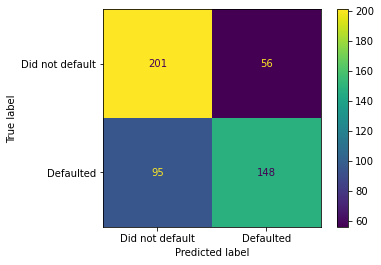

In [45]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=['Did not default', 'Defaulted'])

So of the 257 people that did not default, **201** were correctly classified. and of the **243** that defaulted, 148 were correctly classified. So the SVM was not so great. Lets try to improve predictions using **Cross Validation** to optimize the parameters. 

## Optimizing parameters using cross validation and gridsearchCV()

Optimizing an SVM is all about finding the best value for **gamma**, and potentially, the regularization parameter **C**. So lets see if we can find better parameter values using cross validation in hope that we can improve the accuracy with the **Testing dataset**. 

Since we have two parameters to optimize, we will use `GridSearchCV()`. We specify a bunch of potential values for **gamma** and **C**, and `GridSearchCV()` tests all the possible combinations of the parameters for us. 

In [51]:
param_grid = [
    {'C':[0.5, 1, 10, 100], # Note: values for C must be > 0. we are trying all these values.
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']}, # typically radial basis function gives the best performance
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5, # folds for cv
    scoring='accuracy', ## accuracy is default scoring) Slightly improved, but hardly!
    ##scoring='balanced_accuracy' ## slightly improved...
    ##scoring='f1' ## terrible
    ##scoring='f1_micro' ## slightly improved...
    ##scoring=f1_macro' ## same..
    ##scoring='f1_weighted' ## same..
    ##scoring='roc_auc', ##terrible!
    verbose=0 # if you want to see what Grid Search is doing, set verbose = 2
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Takes some time - which is why we downsize the dataset!! So the ideal value for **C** is 100, which means we will use regularization, and the ideal value for `gamma` is **0.001**.

## Building, Drawing, Evaluating, and Interpretting the Final SVM
Now that we have ideal values for `C` and `gamma`, we can build the final SVM.

In [53]:
clf_svm = SVC(random_state=42, C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

Now lets draw another confusion matrix to see if the optimized SVM does better.

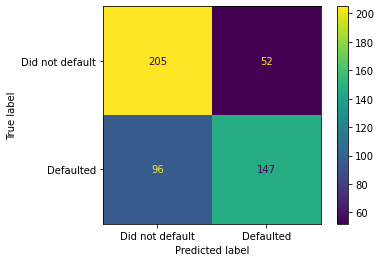

In [54]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not default', 'Defaulted'])

These are just *a little bit* better than before. 4 more people were correctly classified as not defaulting and only **1** more person was *incorrectly* classified as defaulting.

In other words, SVM was pretty good straight out of the box without much optimization. This makes SVM great, quick, and dirty method for relatively small datasets. 

**NOTE**: although classification with this dataset and an SVM is not so great, it may be better than other methods. We have to compare to find out.

The last thing we are going to do is draw a SVM decision boundary and discuss how to interpret it.

The first thing we need to do is count the number of columns in X:

In [55]:
len(df_downsample.columns)

24

So we see that there are 24 features, or columns, in X. This is a problem because it would require a 24-dimensional graph to plot the data in its raw form. If we wanted to, we could just pick two features at random to use as x and y-axes on our graph, but instead, we will use PCA to combine the 24 features into 2 orthogonal meta-features that we can use as axes for a graph. 

However, before we shrink the graph, lets first determine how accurate the shrunken graph will be. If its relatively accurate, then it makes sense to draw the 2-D graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph using a **scree plot**. 

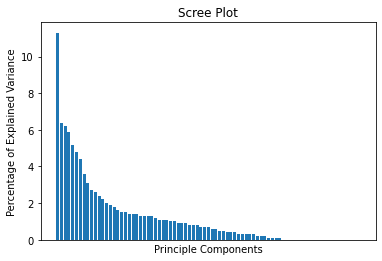

In [57]:
pca = PCA() # NOTE: by default, PCA centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',# changes apply to the x axis
    which='both', # both major and minor ticks are affected
    bottom=False, # ticks along the bottom edge are off
    top=False, # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Components')
plt.title('Scree Plot')
plt.show()

What we would like is for the first two principle components to explain a lot of the variance. (Much taller than the rest). In this case, we don't see that. The first one is great but the second one is just barely above the third one, which is not so great. This approximimation will not be great. Lets roll with it anyways

Now we will draw the PCA graph. **NOTE** this code is a bit more technical. First lets optimize an SVM fit to PC1 and PC2

In [58]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

## NOTE: 
## PC1 contains the x axis coordinates of the data after PCA
## PC2 contains the y-axis coordinates

## Now scale and center the PCs

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...

param_grid = [
    {'C': [1, 10, 100, 1000],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Note we are only using two columns now instead of 24! we get different optimal parameters. Now lets draw the graph